# <font color='Blue'>Decision Tree Classification .</font>

- For DT Regression we did Calculations using MSE, But here we have to do two methods here to find Nodes.

                                                                                     
**Gini impurity**  

    
**Entropy**  

# <font color='Blue'>       </font>

### <font color='magenta'>Gini Impurity </font>

Measures impurity in classification tasks.

**Mathematical formula for Gini Impurity**

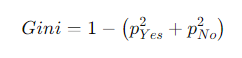

**Mathematical formula for Weighted Gini Impurity**

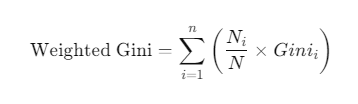

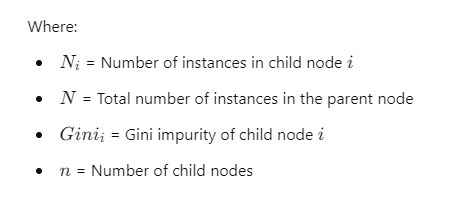

- First we have to calculate Gini, Then that Gini value intercept in Weighted Gini. 

# <font color='Blue'>       </font>

# <font color='Blue'>       </font>

## **Taking example data set and calculating mathematically this Gini Impurity**

# <font color='Blue'>       </font>

**Continuing with how to from a DT**

# <font color='Blue'>       </font>

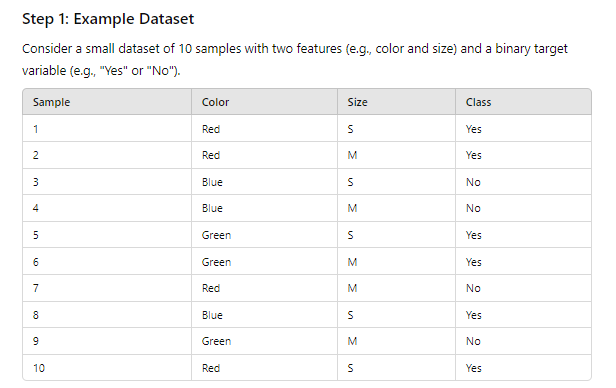

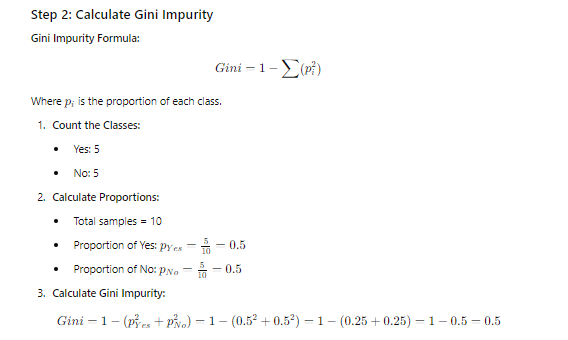

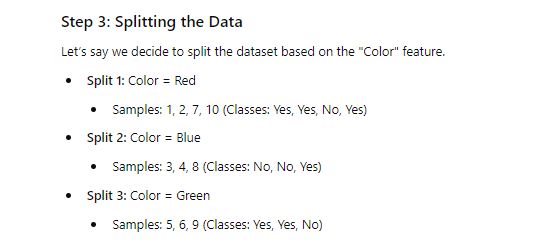

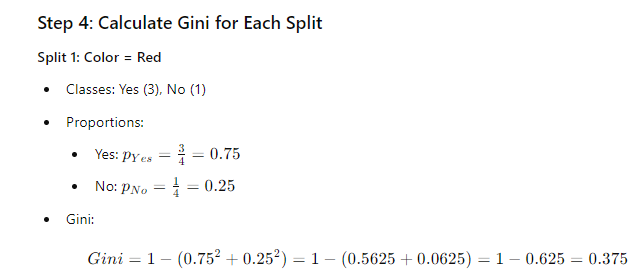

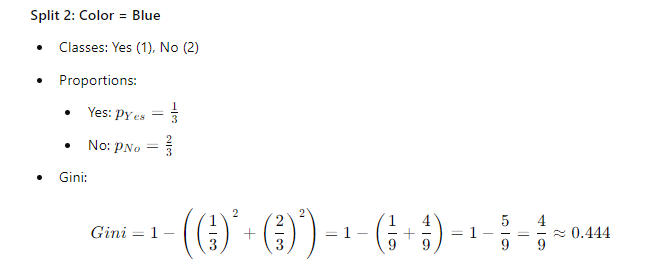

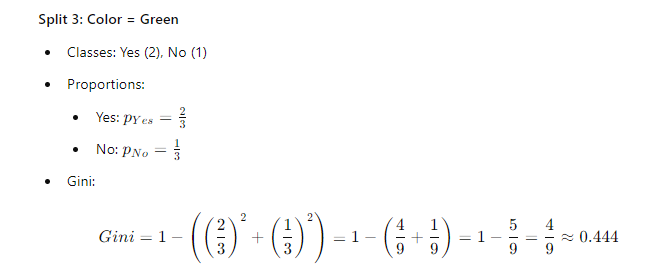

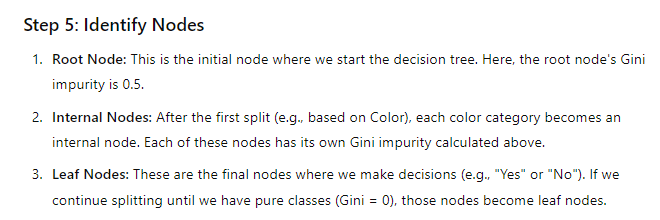

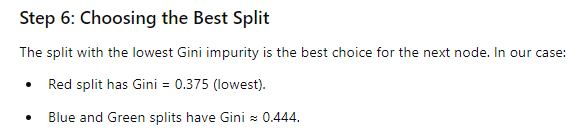

- We can see How to find Gini impurity and also what are the steps we have to do to form a DT.

# <font color='Blue'>       </font>

# <font color='Blue'>       </font>

### <font color='magenta'>Entropy      </font>

- Similar to the Gini impurity meaning and everthing, but the change is formulas and we have apply Logritham for this Entropy

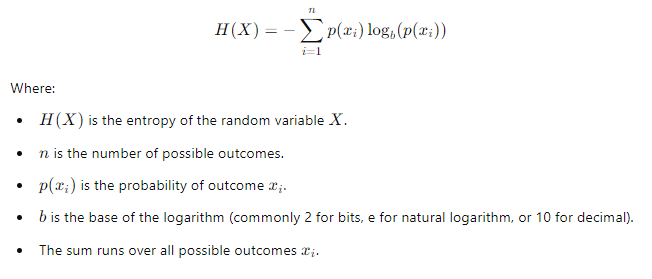

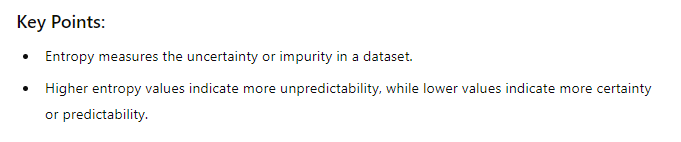

# <font color='Blue'>       </font>

### <font color='magenta'> Differnece B/W Ginni and Entropy      </font>

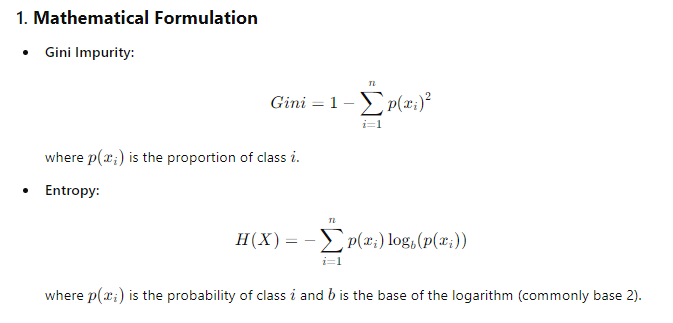

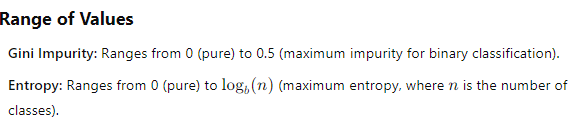

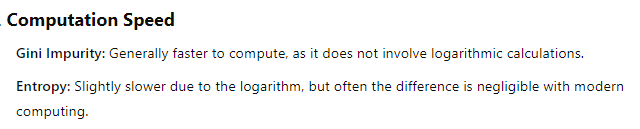

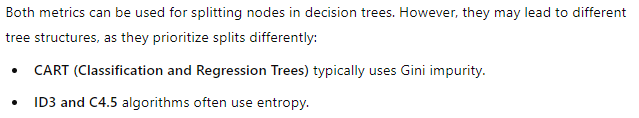

# <font color='Blue'>       </font>

# <font color='Blue'>       </font>

# <font color='Blue'>       </font>

# <font color='Blue'>       </font>

# <font color='red'>Model Buliding for DT Classification       </font>

The problem is to predict the safety of the car.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

#### <font color='magenta'> Importing Data set (EXCEL)      </font>

In [3]:
import pandas as pd
import numpy as np

data = pd.read_excel("D:/Sai/Data sets/DT/DT Classification Data.xlsx")
data

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


#### <font color='magenta'>  EDA    </font>

In [4]:
# view dimensions of dataset

data.shape

(1728, 7)

In [5]:
# preview the dataset

data.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
# Summary of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1728 non-null   object
 1   Maint     1728 non-null   object
 2   Doors     1728 non-null   object
 3   Persons   1728 non-null   object
 4   Lug_boot  1728 non-null   object
 5   Safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
#Frequency distribution of values in variables

#Now, I will check the frequency counts of categorical variables.


col_names = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class']


for col in col_names:
    
    print(data[col].value_counts())  

Buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
Persons
2       576
4       576
more    576
Name: count, dtype: int64
Lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
Safety
low     576
med     576
high    576
Name: count, dtype: int64
Class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

#### *Summary of variables*

- There are 7 variables in the dataset. All the variables are of categorical data type.

- These are given by buying, maint, doors, persons, lug_boot, safety and class.

- class is the target variable.

#### *Explore class variable*

In [10]:
data['Class'].value_counts()

Class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

#### *Missing values in variables*

In [11]:
# check missing values in variables

data.isnull().sum()

Buying      0
Maint       0
Doors       0
Persons     0
Lug_boot    0
Safety      0
Class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

#### <font color='magenta'>Declare feature vector and target variable      </font>

In [12]:
X = data.drop(['Class'], axis=1)

y = data['Class']

#### <font color='magenta'>  Split data into separate training and test set      </font>

In [13]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

#### <font color='magenta'> Feature Engineering       </font>

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will check the data types of variables again.

In [15]:
# check data types in X_train

X_train.dtypes

Buying      object
Maint       object
Doors       object
Persons     object
Lug_boot    object
Safety      object
dtype: object

#### *Encode categorical variables*

Now, I will encode the categorical variables.

In [17]:
X_train.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


We can see that all the variables are ordinal categorical data type.

In [18]:
# import category encoders

import category_encoders as ce

In [19]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [20]:
X_train.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [21]:
X_test.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


We now have training and test set ready for model building.

#### <font color='magenta'>  Decision Tree Classifier with criterion gini index    </font>

In [22]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [23]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

#### *Predict the Test set results with criterion gini index*

In [24]:
y_pred_gini = clf_gini.predict(X_test)

#### *Check accuracy score with criterion gini index*

In [25]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8021


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

#### *Compare the train-set and test-set accuracy*

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [26]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [27]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7865


#### *Check for overfitting and underfitting*

In [28]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

#### <font color='magenta'> Decision Tree Classifier with criterion entropy   </font>

In [29]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#### *Predict the Test set results with criterion entropy*

In [30]:
y_pred_en = clf_en.predict(X_test)

#### *Check accuracy score with criterion entropy*

In [31]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8021


#### *Compare the train-set and test-set accuracy*

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [32]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [33]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7865


#### *Check for overfitting and underfitting*

In [34]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

#### <font color='magenta'>  Confusion matrix      </font>

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [35]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


#### <font color='magenta'>  Classification Report     </font>

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



#### <font color='magenta'> Results and conclusion      </font>

In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8021.


In the model with criterion gini index, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.


Similarly, in the model with criterion entropy, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.


In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
The confusion matrix and classification report yields very good model performance.

# <font color='red'>END       </font>